# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

## Step 1: Read in Data

In [116]:
house_train = pd.read_csv('data/kc_house_data_train.csv', index_col = 0)
house_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [117]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [118]:
# Change date variable to something useful. 
house_train['month_sold'] = house_train.date.apply(lambda x: int(x[4:6]))
house_train['yr_sold'] = house_train.date.apply(lambda x: int(x[0:4]))
house_train.date = house_train.date.apply(lambda x: int(x[0:8]))


There's a house with 30+ bedrooms. Let's take a look at that.

In [120]:
house_train[house_train.bedrooms > 20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold
8597,2402100895,20140625,640000.0,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,6,2014


It's likely that 33 bedrooms is an error, since it's a small place with less than 2 bathrooms. We will change that value to more appropriate number.

In [121]:
round((house_train.bedrooms/house_train.sqft_living).median()*1620)
# median # of bedroom per sqft.living multiplied by sqft.living 
house_train.at[8597, 'bedrooms'] = 3

### Age 
I'll create a new measure called age.  
This will be time between the last renovation till sales date.  
Or since the date built if it has never been renovated.  

In [124]:
house_train['age'] = np.where(house_train.yr_renovated == 0, house_train.yr_sold - house_train.yr_built, 
         house_train.yr_sold - house_train.yr_renovated)

### Per condition


In [127]:
house_train.shape

(17290, 24)

#### Price distribution

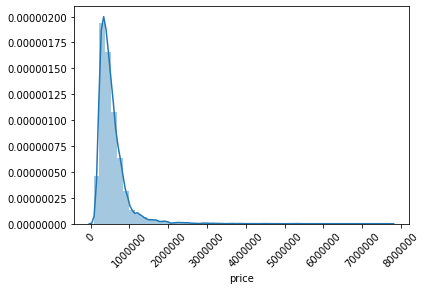

In [128]:
sns.distplot(house_train.price)
plt.xticks(rotation=45)
plt.show()

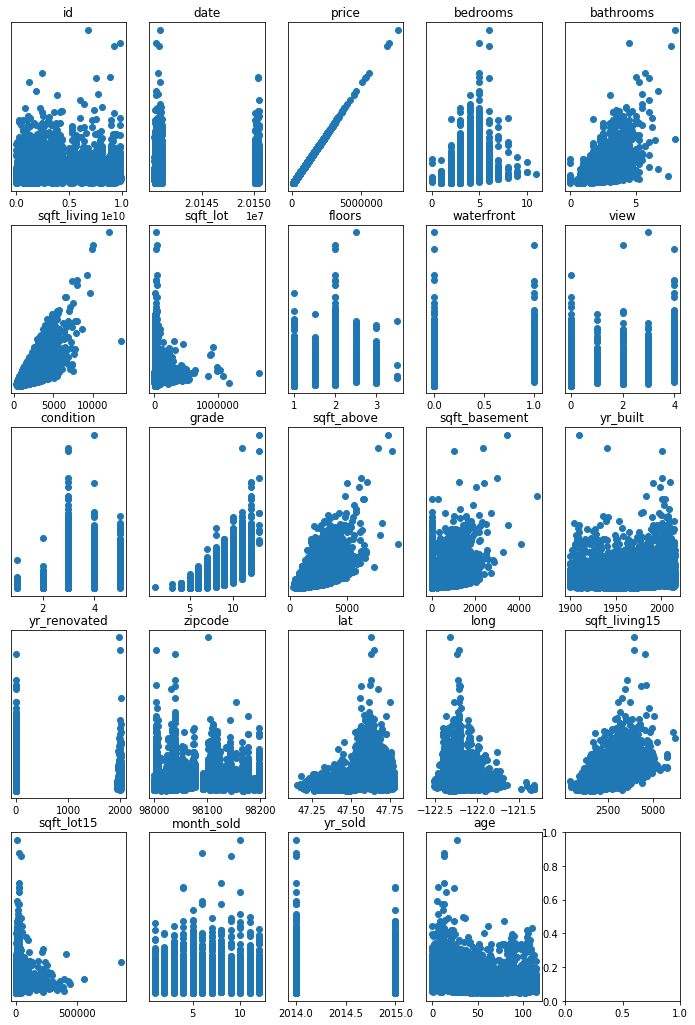

In [129]:
# for each columns, plot scatter plot
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (12, 18))

axes = axes.ravel() 

for i in range(len(house_train.columns)):
    axes[i].scatter(house_train.iloc[:, i], house_train.price)
    axes[i].set_title(house_train.columns[i])
    axes[i].get_yaxis().set_ticks([])


### Observations
#### Clear correlation
1. Sqft.living, grade
(bedroom and bathroom also strongly correlates but likely covered by sqft.living)

#### Outliers to deal with
1. Bedroom - one outlier (v)

#### Further investigation needed
1. age - some negative correlation after certain price point.
2. Condition 



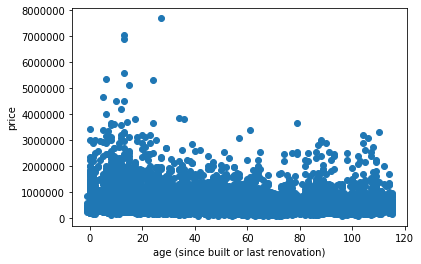

In [131]:
plt.scatter(house_train.age, house_train.price)
plt.xlabel("age (since built or last renovation)")
plt.ylabel("price")
plt.show()

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [ ]:
#your code here 

### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [ ]:
# your code here

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [1]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/